# Iteration 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Data Understanding

In [2]:
df1 = pd.read_csv('set15_it1.csv')

In [3]:
df2 = pd.read_csv('set15_it2.csv')

In [4]:
df1

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit
0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,sqft
1,1,105000.0,GnomeBurough,Petalbridge,772.0,3960.0,sqft
2,2,79275.0,Meadowlands,Shadowmere,664.0,8172.0,sqft
3,3,140000.0,Meadowlands,Emberfall,1231.0,13825.0,sqft
4,4,150909.0,GnomeBurough,Mystvale,1406.0,9060.0,sqft
...,...,...,...,...,...,...,...
2358,2335,184500.0,Meadowlands,Duskwood,1056.0,13300.0,sqft
2359,2336,210000.0,Meadowlands,Nighthaven,1594.0,13175.0,sqft
2360,2337,223500.0,Meadowlands,Stormwatch,1212.0,21384.0,sqft
2361,2338,129900.0,Meadowlands,Dragonspire,627.0,7100.0,sqft


In [5]:
df2

,DI,StructuralIntegrity,ExteriorCharm
0,0,4,Common
1,1,8,Common
2,2,5,Common
3,3,6,Common
4,4,6,Common
...,...,...,...
2358,2335,5,Gleaming
2359,2336,6,Common
2360,2337,6,Common
2361,2338,7,Common


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DI                   2363 non-null   int64 
 1   StructuralIntegrity  2363 non-null   int64 
 2   ExteriorCharm        2363 non-null   object
dtypes: int64(2), object(1)
memory usage: 55.5+ KB


In [7]:
df2.describe()

,DI,StructuralIntegrity
count,2363.000000,2363.000000
mean,1169.813796,5.563690
std,675.447687,1.103678
min,0.000000,1.000000
25%,584.500000,5.000000
50%,1170.000000,5.000000
75%,1753.500000,6.000000
max,2339.000000,9.000000


In [8]:
df2.sample(30)

,DI,StructuralIntegrity,ExteriorCharm
868,860,6,Gleaming
1696,1680,5,Common
693,685,5,Enchanting
1048,1038,5,Common
1959,1940,5,Common
1792,1774,8,Common
795,787,5,Gleaming
245,244,6,Common
1413,1400,5,Common
1541,1526,8,Common


In [9]:
df2.isna().sum()

DI                     0
StructuralIntegrity    0
ExteriorCharm          0
dtype: int64

In [10]:
df2['ExteriorCharm'].value_counts()

ExteriorCharm
Common        1446
Gleaming       794
Enchanting      96
Modest          27
Name: count, dtype: int64

In [11]:
df2['StructuralIntegrity'].value_counts()

StructuralIntegrity
5    1349
6     421
7     307
8     118
4      82
3      41
9      35
2       7
1       3
Name: count, dtype: int64

In [12]:
df2.loc[df2.duplicated()]

,DI,StructuralIntegrity,ExteriorCharm
61,60,6,Common
309,307,7,Common
391,388,7,Common
509,505,6,Common
522,517,5,Common
526,520,7,Common
599,592,5,Gleaming
660,652,6,Common
991,982,7,Common
1012,1002,5,Gleaming


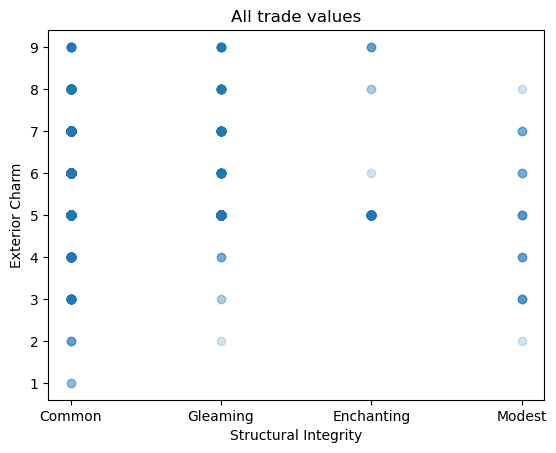

In [13]:
plt.scatter(df2['ExteriorCharm'], df2['StructuralIntegrity'], alpha=0.2)
plt.title('All trade values')
plt.ylabel('Exterior Charm')
plt.xlabel('Structural Integrity')
plt.show()

This should give a nice general idea of how the data is distributed

## 2. Data Preparation

Since there would be a mismatch in row number otherwise, and all the data in this new set looks perfectly fine, we will first merge the datasets before repeating the data prep of iteration 1.

In [14]:
df = df1.merge(df2, left_index=True, right_index=True, how="inner")

In [15]:
df

,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit,DI_y,StructuralIntegrity,ExteriorCharm
0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,sqft,0,4,Common
1,1,105000.0,GnomeBurough,Petalbridge,772.0,3960.0,sqft,1,8,Common
2,2,79275.0,Meadowlands,Shadowmere,664.0,8172.0,sqft,2,5,Common
3,3,140000.0,Meadowlands,Emberfall,1231.0,13825.0,sqft,3,6,Common
4,4,150909.0,GnomeBurough,Mystvale,1406.0,9060.0,sqft,4,6,Common
...,...,...,...,...,...,...,...,...,...,...
2358,2335,184500.0,Meadowlands,Duskwood,1056.0,13300.0,sqft,2335,5,Gleaming
2359,2336,210000.0,Meadowlands,Nighthaven,1594.0,13175.0,sqft,2336,6,Common
2360,2337,223500.0,Meadowlands,Stormwatch,1212.0,21384.0,sqft,2337,6,Common
2361,2338,129900.0,Meadowlands,Dragonspire,627.0,7100.0,sqft,2338,7,Common


In [16]:
df.sample(10)

,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit,DI_y,StructuralIntegrity,ExteriorCharm
751,743,132250.0,Meadowlands,Crystalhollow,799.0,25286.0,sqft,743,5,Common
12,12,139500.0,GnomeBurough,Petalbridge,1119.0,6000.0,sqft,12,7,Gleaming
1552,1537,147900.0,Meadowlands,Sunspire,843.0,16561.0,sqft,1537,5,Common
1793,1775,123900.0,GnomeBurough,Stormwatch,799.0,6240.0,sqft,1775,7,Common
1359,1347,245500.0,Meadowlands,Mossheart,990.0,14963.0,sqft,1347,5,Gleaming
2234,2212,178900.0,Meadowlands,Nighthaven,1443.0,8000.0,sqft,2212,6,Common
810,802,115000.0,GnomeBurough,Stormwatch,765.0,6120.0,sqft,802,6,Common
996,987,126000.0,Meadowlands,Sunspire,761.0,8775.0,sqft,987,5,Common
982,974,161900.0,Meadowlands,Stormhold,NaN,7804.0,sqft,974,7,Common
1197,1186,200500.0,Meadowlands,Sunspire,1293.0,8750.0,sqft,1186,5,Common


In [17]:
df["ParcelSize"] = df["ParcelSize"].abs()

In [18]:
df.sort_values(by=["ParcelSize"]).head(50)

,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit,DI_y,StructuralIntegrity,ExteriorCharm
1240,1229,99.5,GnomeBurough,Mystvale,1011.0,0.043300,sqft,1229,6,Common
688,680,140.2,Meadowlands,Stormwatch,1213.0,0.064350,sqft,680,5,Common
496,493,61.5,Meadowlands,Shadowmere,NaN,0.068820,sqft,493,3,Common
1270,1259,140.0,GnomeBurough,Petalbridge,719.0,0.072000,sqft,1259,5,Common
147,146,227.0,Meadowlands,Nighthaven,1280.0,0.084000,sqft,146,6,Gleaming
1002,993,127.0,Meadowlands,Shadowmere,1177.0,0.093500,sqft,993,6,Common
184,183,129.5,GnomeBurough,Petalbridge,1583.0,0.096000,sqft,183,5,Common
1126,1116,255.5,Meadowlands,Silverglen,1320.0,0.111460,sqft,1116,5,Gleaming
1636,1620,215.0,Meadowlands,Crystalhollow,1508.0,0.122090,sqft,1620,5,Common
623,616,174.0,Meadowlands,Duskwood,1141.0,0.125890,sqft,616,5,Gleaming


In [19]:
df['ParcelSize'] = df.apply(lambda x: x['ParcelSize'] * 10.7639 if x['ParcelSizeUnit'] == 'sqm' else x['ParcelSize'], axis=1)

In [20]:
df.replace(to_replace='sqm', value='sqft', inplace=True)

In [21]:
df['TradeValue'] = df.apply(lambda x: x['TradeValue'] * 1000 if x['ParcelSize'] < 1 else x['TradeValue'], axis=1)

In [22]:
df['ParcelSize'] = df['ParcelSize'].apply(lambda x: x * 100000 if x < 1 else x)

In [23]:
df.sort_values(by=["ParcelSize"]).head(15)

,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit,DI_y,StructuralIntegrity,ExteriorCharm
888,880,73000.0,GnomeBurough,Wolfsbane,484.0,1470.0,sqft,880,6,Common
1739,1722,76000.0,GnomeBurough,Wolfsbane,839.0,1476.0,sqft,1722,7,Common
1889,1870,98000.0,GnomeBurough,Wolfsbane,839.0,1477.0,sqft,1870,9,Common
771,763,80000.0,GnomeBurough,Wolfsbane,484.0,1477.0,sqft,763,4,Common
2023,2003,137000.0,GnomeBurough,Oakenshade,945.0,1488.0,sqft,2003,6,Common
516,512,93900.0,GnomeBurough,Wolfsbane,839.0,1495.0,sqft,512,6,Common
563,557,85500.0,GnomeBurough,Wolfsbane,839.0,1504.0,sqft,557,4,Common
1263,1252,86000.0,GnomeBurough,Wolfsbane,484.0,1526.0,sqft,1252,8,Common
892,884,79500.0,GnomeBurough,Wolfsbane,839.0,1526.0,sqft,884,5,Common
1234,1223,87550.0,GnomeBurough,Wolfsbane,839.0,1533.0,sqft,1223,5,Common


In [24]:
df['ParcelSizeUnit'].unique()

array(['sqft'], dtype=object)

In [25]:
df = df[df['TradeValue'] < 700000]

In [26]:
df["Enclave"] = df["Enclave"].str.lower()

/tmp/ipykernel_4714/2910308930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Enclave"] = df["Enclave"].str.lower()


In [27]:
df["Enclave"] = df["Enclave"].str.title()

/tmp/ipykernel_4714/3562705285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Enclave"] = df["Enclave"].str.title()


In [28]:
df['Enclave'] = df['Enclave'].str.rstrip('s')

/tmp/ipykernel_4714/967876523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Enclave'] = df['Enclave'].str.rstrip('s')


In [29]:
df['Enclave'].sort_values().unique()

array(['Brightforge', 'Cloudrest', 'Crystalhollow', 'Dragonspire',
       'Dreamweaver', 'Duskwood', 'Emberfall', 'Glimmerwood', 'Moonglade',
       'Mossheart', 'Mystvale', 'Nighthaven', 'Oakenshade', 'Petalbridge',
       'Ravenstone', 'Riverbend', 'Shadowmere', 'Silverglen', 'Starfall',
       'Stormhold', 'Stormwatch', 'Sunspire', 'Thornfield', 'Verdantia',
       'Windwhisper', 'Wolfsbane', 'Wyverncliff'], dtype=object)

In [30]:
df = df.drop_duplicates()

In [31]:
df.duplicated().sum()

np.int64(0)

In [32]:
df.loc[df['LivingQuarters'].isna()].sample(30)

,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit,DI_y,StructuralIntegrity,ExteriorCharm
445,442,140000.0,GnomeBurough,Petalbridge,NaN,10300.0,sqft,442,6,Common
1604,1588,154900.0,Meadowlands,Thornfield,NaN,7681.0,sqft,1588,6,Common
1882,1863,120000.0,Meadowlands,Shadowmere,NaN,12180.0,sqft,1863,7,Common
167,166,109008.0,Meadowlands,Dragonspire,NaN,8593.0,sqft,166,6,Common
1250,1239,164990.0,Meadowlands,Sunspire,NaN,8767.0,sqft,1239,5,Gleaming
1727,1710,248500.0,Meadowlands,Silverglen,NaN,6472.0,sqft,1710,5,Enchanting
1086,1076,119000.0,Meadowlands,Shadowmere,NaN,8405.0,sqft,1076,8,Common
554,548,68400.0,ArcaneMarket,Mystvale,NaN,7500.0,sqft,548,4,Common
1348,1336,45000.0,GnomeBurough,Petalbridge,NaN,5925.0,sqft,1336,4,Common
2204,2183,158900.0,Meadowlands,Emberfall,NaN,11616.0,sqft,2183,5,Common


In [33]:
df['LivingQuarters'] = df['LivingQuarters'].fillna(df['LivingQuarters'].median())

In [34]:
df.loc[df['LivingQuarters'].isna()]

,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit,DI_y,StructuralIntegrity,ExteriorCharm


In [35]:
df

,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit,DI_y,StructuralIntegrity,ExteriorCharm
0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,sqft,0,4,Common
1,1,105000.0,GnomeBurough,Petalbridge,772.0,3960.0,sqft,1,8,Common
2,2,79275.0,Meadowlands,Shadowmere,664.0,8172.0,sqft,2,5,Common
3,3,140000.0,Meadowlands,Emberfall,1231.0,13825.0,sqft,3,6,Common
4,4,150909.0,GnomeBurough,Mystvale,1406.0,9060.0,sqft,4,6,Common
...,...,...,...,...,...,...,...,...,...,...
2358,2335,184500.0,Meadowlands,Duskwood,1056.0,13300.0,sqft,2335,5,Gleaming
2359,2336,210000.0,Meadowlands,Nighthaven,1594.0,13175.0,sqft,2336,6,Common
2360,2337,223500.0,Meadowlands,Stormwatch,1212.0,21384.0,sqft,2337,6,Common
2361,2338,129900.0,Meadowlands,Dragonspire,627.0,7100.0,sqft,2338,7,Common


In [36]:
df.describe()

,DI_x,TradeValue,LivingQuarters,ParcelSize,DI_y,StructuralIntegrity
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,1169.760479,181527.821215,1152.836612,10046.660674,1169.760479,5.563302
std,675.842382,80164.061659,377.971615,7126.006466,675.842382,1.106856
min,0.000000,12789.000000,256.000000,1470.000000,0.000000,1.000000
25%,584.250000,129925.000000,883.000000,7427.750000,584.250000,5.000000
50%,1170.500000,160350.000000,1115.000000,9375.000000,1170.500000,5.000000
75%,1754.750000,213000.000000,1326.000000,11509.000000,1754.750000,6.000000
max,2339.000000,625000.000000,4339.000000,164660.000000,2339.000000,9.000000


Since the ParcelSizeUnit column is all just sqft, that column can be deleted and instead ParcelSize should be renamed to clarify that it's in sqft

In [37]:
df.drop(columns=['ParcelSizeUnit'] ,inplace=True)

In [38]:
df.head()

,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,DI_y,StructuralIntegrity,ExteriorCharm
0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,0,4,Common
1,1,105000.0,GnomeBurough,Petalbridge,772.0,3960.0,1,8,Common
2,2,79275.0,Meadowlands,Shadowmere,664.0,8172.0,2,5,Common
3,3,140000.0,Meadowlands,Emberfall,1231.0,13825.0,3,6,Common
4,4,150909.0,GnomeBurough,Mystvale,1406.0,9060.0,4,6,Common


In [39]:
df.rename(columns={'ParcelSize' : 'ParcelSize (sqft)'}, inplace=True)

In [40]:
df.head()

,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize (sqft),DI_y,StructuralIntegrity,ExteriorCharm
0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,0,4,Common
1,1,105000.0,GnomeBurough,Petalbridge,772.0,3960.0,1,8,Common
2,2,79275.0,Meadowlands,Shadowmere,664.0,8172.0,2,5,Common
3,3,140000.0,Meadowlands,Emberfall,1231.0,13825.0,3,6,Common
4,4,150909.0,GnomeBurough,Mystvale,1406.0,9060.0,4,6,Common


In [44]:
monthly_income = 2500

In [46]:
df['MonthlyPayment'] = ((df['TradeValue'] - (df['TradeValue'] * 0.2)) * (1/3) * (1 + (1/3)) ** 360) / ((1 + (1/3)) ** 360 - 1)

In [47]:
df.sample(5)

,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize (sqft),DI_y,StructuralIntegrity,ExteriorCharm,MonthlyPayment
1172,1161,485000.0,Meadowlands,Silverglen,2415.0,13517.981098,1161,5,Enchanting,129333.333333
549,543,274300.0,Meadowlands,Sunspire,1613.0,9750.000000,543,6,Common,73146.666667
546,540,178900.0,Meadowlands,Dragonspire,1161.0,9680.000000,540,6,Common,47706.666667
1226,1215,55993.0,ArcaneMarket,Mystvale,803.0,8712.000000,1215,5,Modest,14931.466667
1693,1677,556581.0,Meadowlands,Riverbend,2206.0,16056.000000,1677,5,Gleaming,148421.600000


In [48]:
df.describe()

,DI_x,TradeValue,LivingQuarters,ParcelSize (sqft),DI_y,StructuralIntegrity,MonthlyPayment
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,1169.760479,181527.821215,1152.836612,10046.660674,1169.760479,5.563302,48407.418991
std,675.842382,80164.061659,377.971615,7126.006466,675.842382,1.106856,21377.083109
min,0.000000,12789.000000,256.000000,1470.000000,0.000000,1.000000,3410.400000
25%,584.250000,129925.000000,883.000000,7427.750000,584.250000,5.000000,34646.666667
50%,1170.500000,160350.000000,1115.000000,9375.000000,1170.500000,5.000000,42760.000000
75%,1754.750000,213000.000000,1326.000000,11509.000000,1754.750000,6.000000,56800.000000
max,2339.000000,625000.000000,4339.000000,164660.000000,2339.000000,9.000000,166666.666667


In [49]:
df['AffordableDwelling'] = 

SyntaxError: invalid syntax (906735993.py, line 1)